# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Visualization settings
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style("whitegrid")

# Load the Dataset

In [4]:
df = pd.read_csv("rolling_stones_spotify.csv")
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


# Initial Data Inspection

In [ ]:
# Shape of the dataset
print("Dataset Shape:",df.shape)


Dataset Shape: (1610, 18)


In [7]:

# Data information
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-

In [8]:
# Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


# Data Cleaning

In [9]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


In [10]:
# Drop duplicates if any
df = df.drop_duplicates()

In [11]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [16]:
# Verify cleaning
print("\nAfter Cleaning Shape:", df.shape)



After Cleaning Shape: (1610, 18)


# Exploratory Data Analysis (EDA)

### Distribution of song popularity

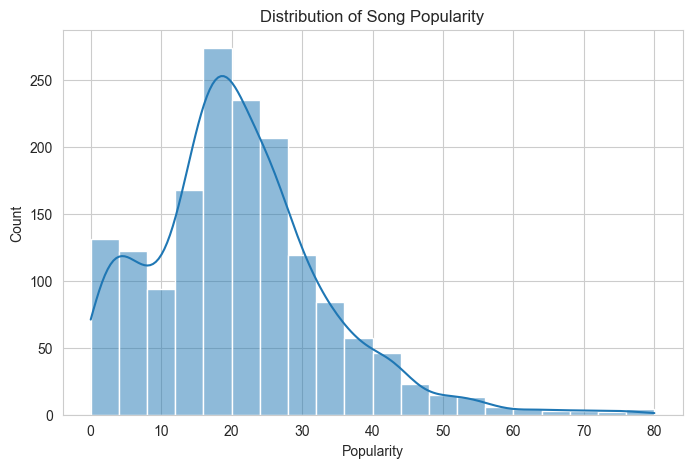

In [17]:
sns.histplot(df['popularity'], bins=20, kde=True)
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

### Correlation Heatmap

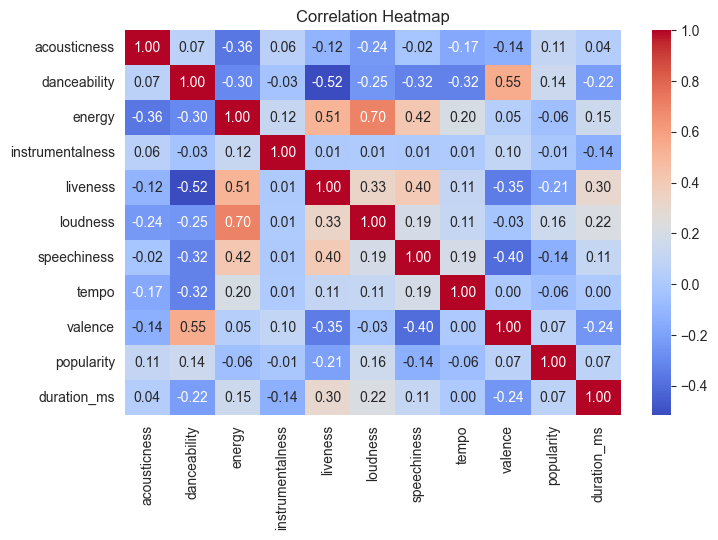

In [18]:
numerical_cols = [
'acousticness','danceability','energy','instrumentalness',
'liveness','loudness','speechiness','tempo','valence',
'popularity','duration_ms'
]

corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Album Recommendation Analysis

In [19]:
# Identify albums with most popular songs
album_popularity = df.groupby('album')['popularity'].mean().sort_values(ascending=False)

album_popularity.head(10)

album
Sticky Fingers (Remastered)                                  53.300000
Some Girls                                                   48.100000
Tattoo You (2009 Re-Mastered)                                46.454545
Exile On Main Street (2010 Re-Mastered)                      44.166667
Beggars Banquet (50th Anniversary Edition)                   43.700000
Aftermath                                                    43.090909
Goats Head Soup (Remastered 2009)                            40.300000
Out Of Our Heads                                             39.583333
Black And Blue (Remastered 2009)                             38.500000
Let It Bleed (50th Anniversary Edition / Remastered 2019)    38.333333
Name: popularity, dtype: float64

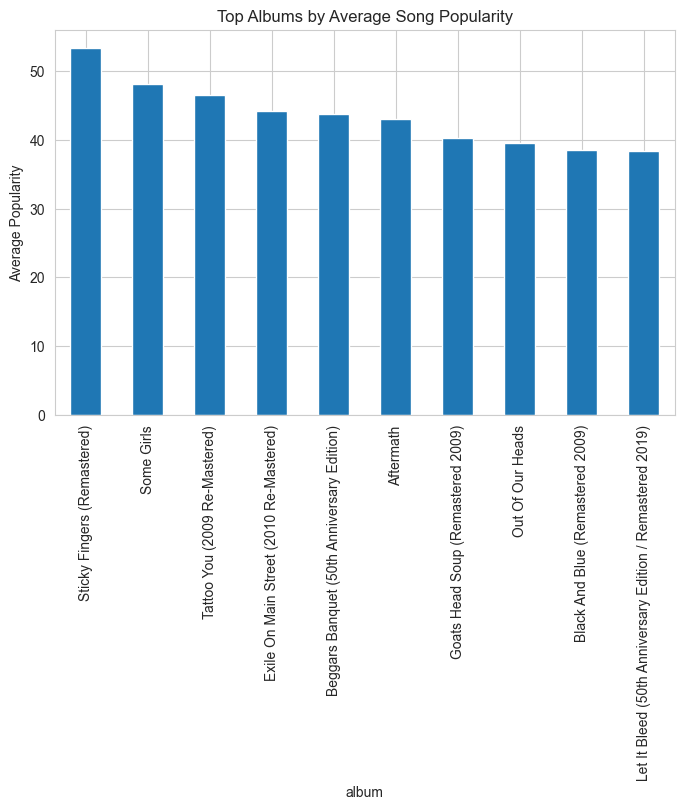

In [20]:
# Visualization: Top albums by average popularity
album_popularity.head(10).plot(kind='bar')
plt.title("Top Albums by Average Song Popularity")
plt.ylabel("Average Popularity")
plt.show()

# Feature Selection for Clustering

In [21]:
features = [
'acousticness','danceability','energy','instrumentalness',
'liveness','loudness','speechiness','tempo','valence','duration_ms'
]

X = df[features]

In [22]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Identify Optimal Number of Clusters (Elbow Method)

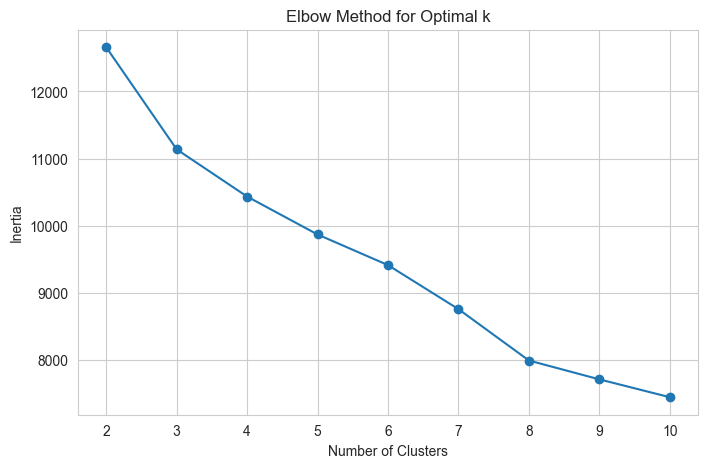

In [26]:
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Silhouette Score Analysis

In [27]:
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")

Silhouette Score for k=2: 0.202
Silhouette Score for k=3: 0.169
Silhouette Score for k=4: 0.135
Silhouette Score for k=5: 0.145
Silhouette Score for k=6: 0.130
Silhouette Score for k=7: 0.141


# Apply K-Means Clustering

In [28]:
# Choose optimal k (example: k=4)
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [29]:
# Cluster counts
print(df['cluster'].value_counts())

cluster
1    522
0    485
3    338
2    265
Name: count, dtype: int64


# Cluster Profiling

In [30]:
cluster_profile = df.groupby('cluster')[features + ['popularity']].mean()
cluster_profile

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,popularity
cluster,,,,,,,,,,,
0,0.152442,0.406414,0.901076,0.154457,0.705607,-5.483144,0.067977,134.027212,0.596701,251928.938144,19.164948
1,0.213671,0.595289,0.767117,0.218140,0.221641,-7.601935,0.047236,121.991565,0.797724,215257.086207,22.614943
2,0.222331,0.334611,0.944242,0.172073,0.876151,-5.245570,0.145030,136.456468,0.332118,356045.343396,18.075472
3,0.470048,0.468462,0.556231,0.088560,0.300559,-9.487246,0.046911,112.864834,0.424447,254597.621302,22.423077


# Dimensionality Reduction using PCA

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.30326096 0.16514826]


In [32]:
# Add PCA components to dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

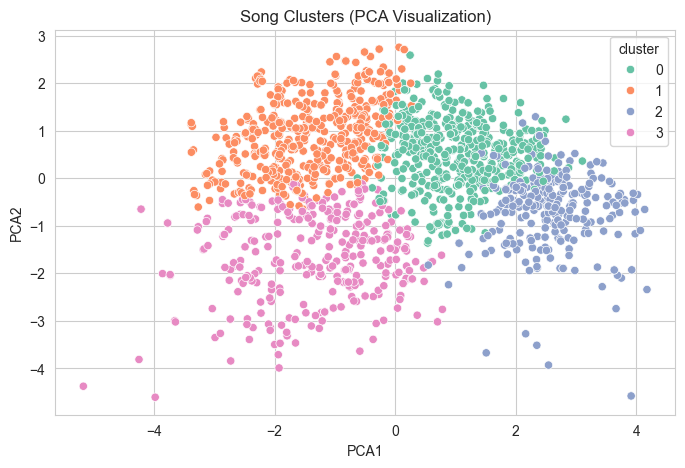

In [33]:
# Visualization of clusters
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set2')
plt.title("Song Clusters (PCA Visualization)")
plt.show()

# Insights & Interpretation

### Example interpretation :
##### - Cluster 0: High energy and loudness (Rock-style songs)
##### - Cluster 1: Acoustic and instrumental-heavy tracks
##### - Cluster 2: Balanced tempo and danceability
##### - Cluster 3: Emotional / low-valence songs

# Final Dataset Preview

In [34]:
df[['name', 'album', 'popularity', 'cluster']].head()

,name,album,popularity,cluster
0,Concert Intro Music - Live,Licked Live In NYC,33,0
1,Street Fighting Man - Live,Licked Live In NYC,34,2
2,Start Me Up - Live,Licked Live In NYC,34,2
3,If You Can't Rock Me - Live,Licked Live In NYC,32,2
4,Don’t Stop - Live,Licked Live In NYC,32,2
